<a href="https://colab.research.google.com/github/Pataweepr/ComEngMath2/blob/master/(ComEngMath2)Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
from scipy import signal,fftpack
import cv2
import matplotlib.pyplot as plt
import IPython.display as ipd
import os

## Problem 1
กำลังหาอยู่

[link data](https://drive.google.com/file/d/1geQ4L6aUOQUSOCwl2UvDl5dgn_ocLFg1/view?usp=sharing)

## Problem 2 (sound)
Filter แบบง่าย optional

In [16]:
sampling_rate = 32000
N=10001
Nf = 3 # Nf--> num freq
t= np.arange(N,dtype=float)
# pick rand period betwwen 10-2010 and convert to freq

# random period 
Ts = np.random.rand(Nf)*2000+10
fs=1/Ts

# fs in sampling rate = 32000
fs_real = fs*sampling_rate

# pick rand Amp and phase
amp = np.random.rand(Nf)*200+ 100
phi = np.random.rand(Nf)*2*np.pi

# create clean signal
h= np.zeros(N)
for i in range(len(fs)):
    h += amp[i]*np.sin(2*np.pi*fs[i]*t + phi[i])

# signal with noise
h_w_noise = h + np.random.randn(N)*3*h + np.random.randn(N)*700

In [17]:
print(fs)
print(fs_real)

[0.00104572 0.00102401 0.00321219]
[ 33.46294011  32.76823189 102.7902355 ]


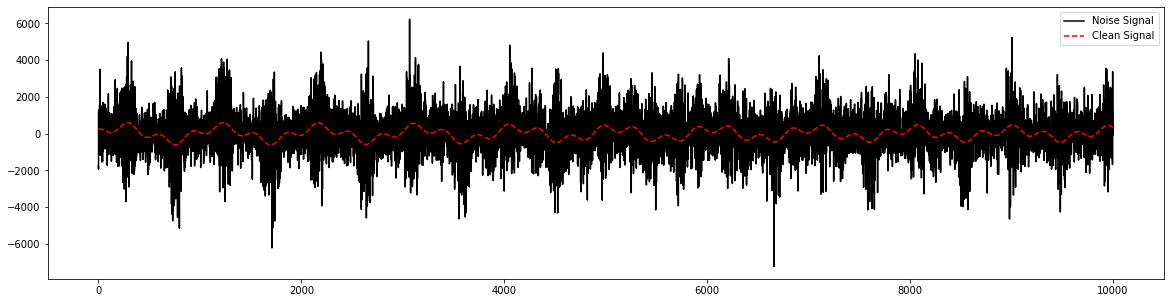

In [18]:
plt.figure(figsize=(20, 5))
plt.plot(t,h_w_noise,'k',label='Noise Signal')
plt.plot(t,h,'r--',label='Clean Signal')
plt.legend(loc='upper right')
plt.show()

In [21]:
Hn = np.fft.fft(h_w_noise)
freq = np.fft.fftfreq(N,d=1/sampling_rate)
print(freq)
print(len(freq))

[ 0.          3.19968003  6.39936006 ... -9.5990401  -6.39936006
 -3.19968003]
10001


[3.19968003e+00 6.39936006e+00 9.59904010e+00 ... 1.59920008e+04
 1.59952005e+04 1.59984002e+04]
[-3.19968003e+00 -6.39936006e+00 -9.59904010e+00 ... -1.59920008e+04
 -1.59952005e+04 -1.59984002e+04]
[6.63723430e+09 2.04472659e+10 2.24253769e+09 ... 6.29481971e+10
 1.72756393e+10 1.45972608e+10]


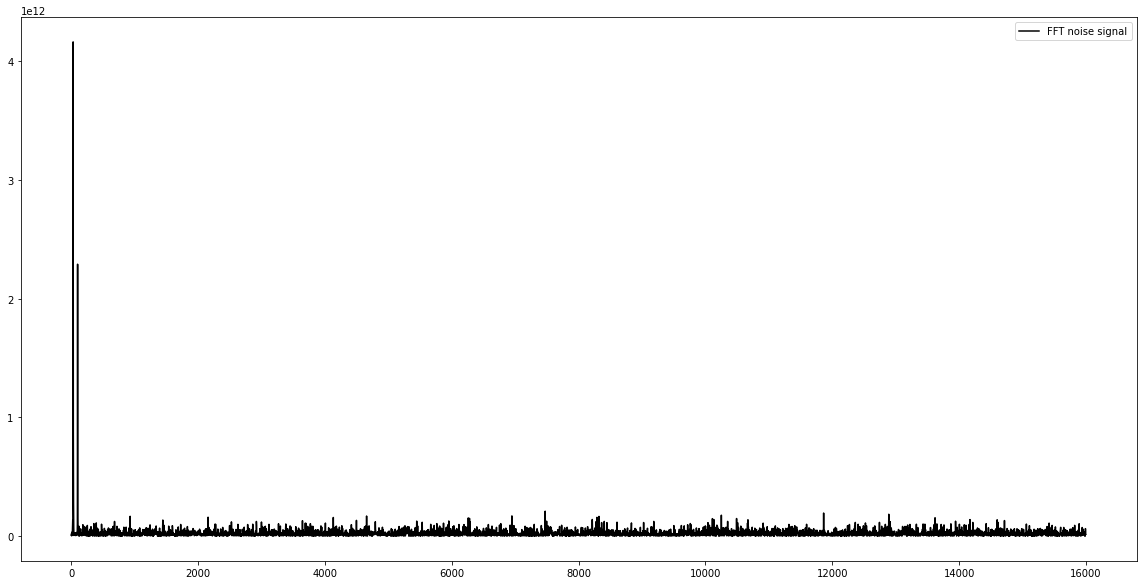

In [22]:
ind_freq = np.arange(1,N//2+1)
freq_pos =  freq[ind_freq]
print(freq_pos)
freq_neg = freq[-ind_freq]
print(freq_neg)
psd =  np.abs(Hn[ind_freq])**2 + np.abs(Hn[-ind_freq])**2 # power spec density 
print(psd)

plt.figure(figsize=(20, 10))
plt.plot(freq[ind_freq],psd,'k-',label='FFT noise signal')
plt.legend(loc='upper right')
plt.show()

### Zoom data

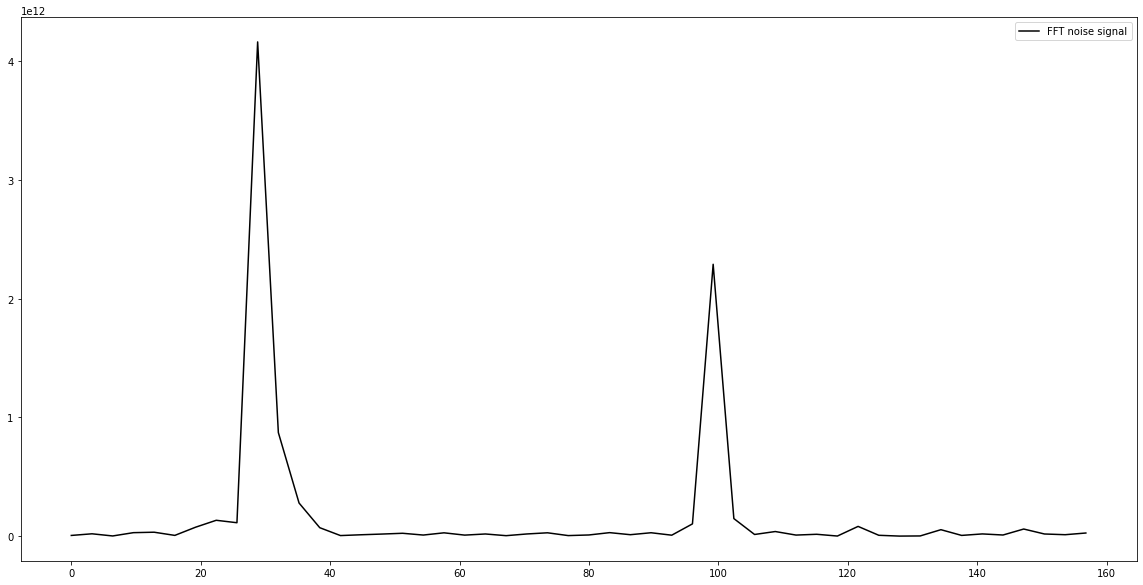

In [23]:
zoom_ind = 50
plt.figure(figsize=(20, 10))
plt.plot(freq[:zoom_ind],psd[:zoom_ind],'k-',label='FFT noise signal')
plt.legend(loc='upper right')
plt.show()

In [24]:
idx_sel = np.where(psd>0.4e12)
# idx_sel
Hn_cut = np.zeros_like(Hn)
Hn_cut[ind_freq[idx_sel]] = Hn[ind_freq[idx_sel]]
Hn_cut[-ind_freq[idx_sel]] = Hn[-ind_freq[idx_sel]]

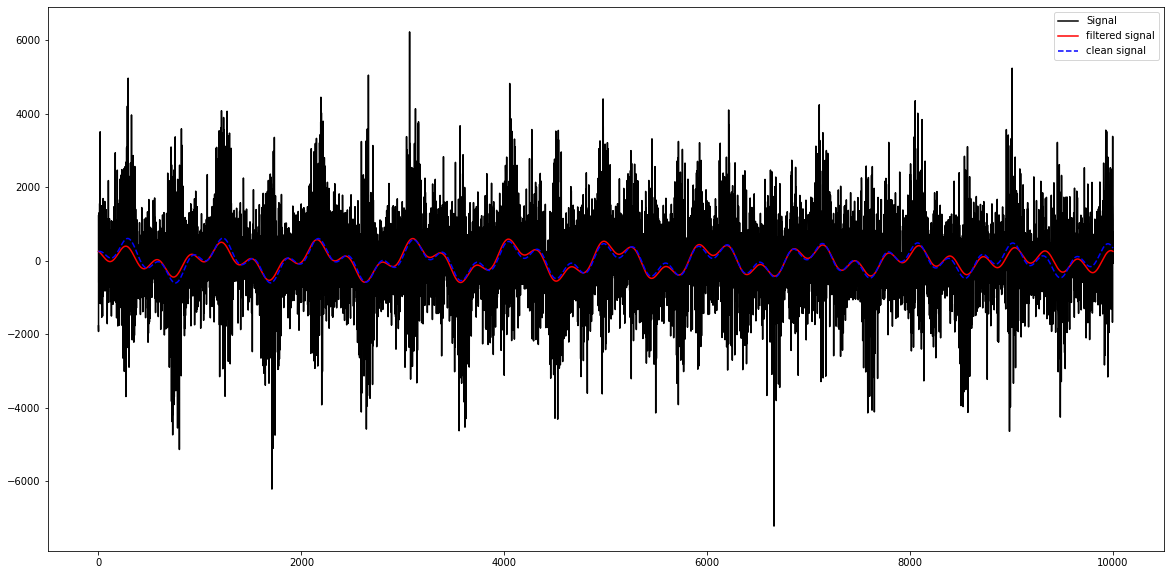

In [25]:
plt.figure(figsize=(20, 10))
plt.plot(t,h_w_noise,'k',label='Signal')
plt.plot(t,np.fft.ifft(Hn_cut).real,'r-',label='filtered signal')
plt.plot(t,h,'b--',label='clean signal')
plt.legend(loc='upper right')
plt.show()

In [26]:
ipd.Audio(h, rate=sampling_rate)

In [27]:
ipd.Audio(h_w_noise, rate=sampling_rate)

In [28]:
ipd.Audio(np.fft.ifft(Hn_cut).real, rate=sampling_rate)

In [29]:
print(fs)
print('-------------')
print(fs_real)
print(freq_pos[idx_sel])

[0.00104572 0.00102401 0.00321219]
-------------
[ 33.46294011  32.76823189 102.7902355 ]
[ 31.99680032  35.19648035 102.38976102]


## Problem 3
Prove Aliasing



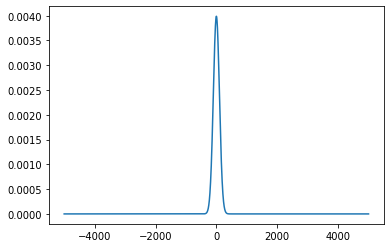

In [31]:
# conv with gussian
sigma = 100.
tt = np.arange(-N//2,N//2)
g = np.exp(-tt**2/2/sigma**2)/np.sqrt(2*np.pi)/sigma
plt.plot(tt,g)

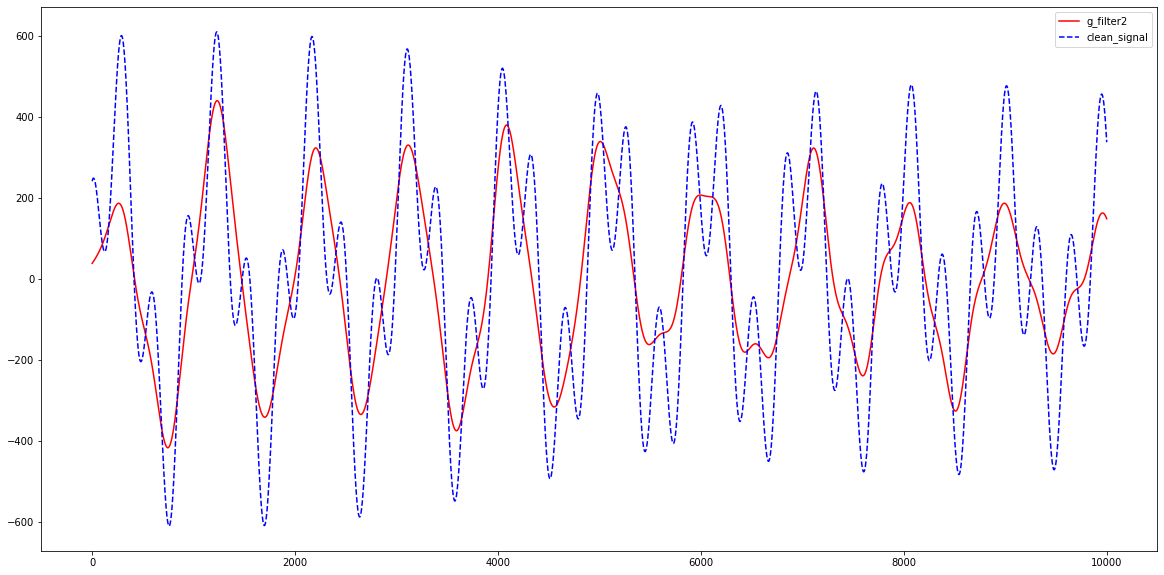

In [33]:
hz = np.zeros(2*N)
hz[N:2*N] = h_w_noise
Hz = np.fft.fft(hz)
tt = np.arange(-N,N)
g = np.exp(-tt**2/2/sigma**2)/np.sqrt(2*np.pi)/sigma
G = np.fft.fft(g)
HzG = Hz*G 
hz_new = np.fft.ifft(HzG)


plt.figure(figsize=(20, 10))
plt.plot(t,hz_new[:N].real,'r-',label='g_filter2')
# plt.plot(t,hn_smooth2[N//2:3*N//2].real,'g--',label='g_filter1')
plt.plot(t,h,'b--',label='clean_signal')
plt.legend(loc='upper right')
plt.show()

## TODO : explain D2A converter

Ans:

## Problem 5 (image)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')
!unzip '/content/gdrive/My Drive/data2.zip'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/
Archive:  /content/gdrive/My Drive/data2.zip
   creating: ComEngMath2_data/
  inflating: ComEngMath2_data/72475__rockwehrmann__glissup02.wav  
  inflating: __MACOSX/ComEngMath2_data/._72475__rockwehrmann__glissup02.wav  
  inflating: ComEngMath2_data/kid_03_normal.wav  
  inflating: __MACOSX/ComEngMath2_data/._kid_03_normal.wav  
  inflating: ComEngMath2_data/.DS_Store  
  inflating: __MACOSX/ComEngMath2_data/._.DS_Store  
  inflating: ComEngMath2_data/21276

In [4]:
!ls ComEngMath2_data/hamtaro0.jpg

100475__iluppai__saxophone-weep.wav
105977__wcfl10__favorite-station.wav
120994__thirsk__120-oboe.wav
132736__ciccarelli__ocean-waves.wav
18871__zippi1__sound-bell-440hz.wav
212764__qubodup__lion-roar.flac
24965__www-bonson-ca__bigdogbarking-02.wav
253887__themusicalnomad__positive-beeps.wav
439520__inspectorj__green-toy-pig-squeaking-a.wav
470767__oorlab__fieldrecording-howling-cats-may2018.wav
72475__rockwehrmann__glissup02.wav
87778__marcgascon7__vocals.wav
92002__jcveliz__violin-origional.wav
adult_01_normal.wav
hamtaro0.jpg
kid_01_normal.wav
kid_02_normal.wav
kid_03_normal.wav
kid_04_normal.wav
kid_05_normal.wav


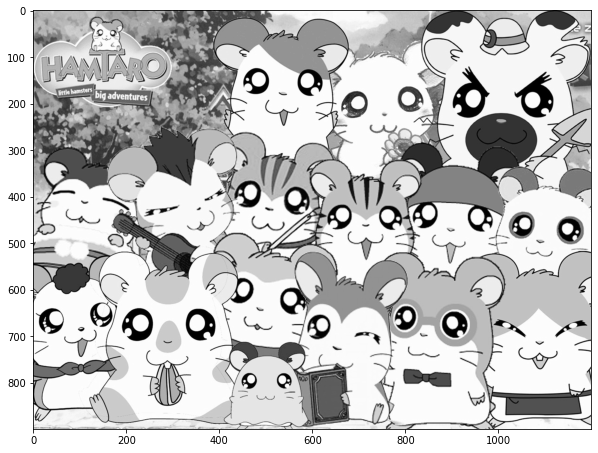

In [6]:
diag_line = np.array([[ 2, -1, -1],
                    [-1, 2, -1],
                    [-1, -1, 2]])
screen_shot = cv2.imread('ComEngMath2_data/hamtaro0.jpg',0)

plt.figure(figsize=(10,10))
plt.imshow(screen_shot, cmap='gray')
plt.show()

# grad = signal.convolve2d(screen_shot,diag_line,boundary='symm',mode='same')

# plt.figure(figsize=(10,10))
# plt.imshow(grad, cmap='gray')
# plt.show()

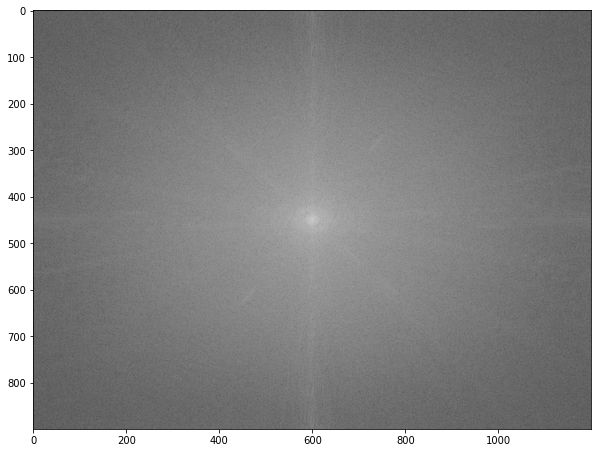

In [8]:
# screen_shot

F1 = fftpack.fft2((screen_shot).astype(float))
F2 = fftpack.fftshift(F1) # FFT center zeros freq
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2))).astype(int), cmap=plt.cm.gray)
plt.show()

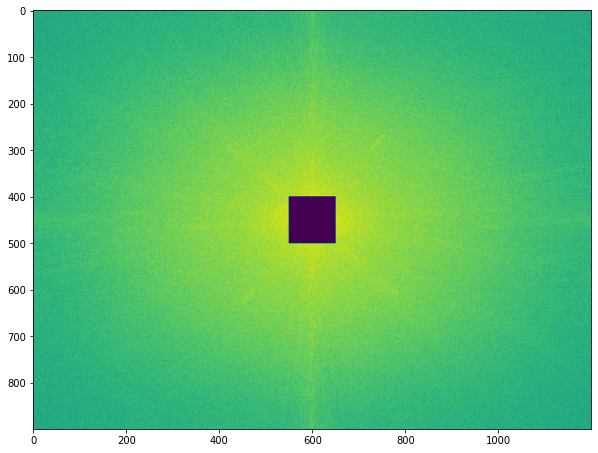

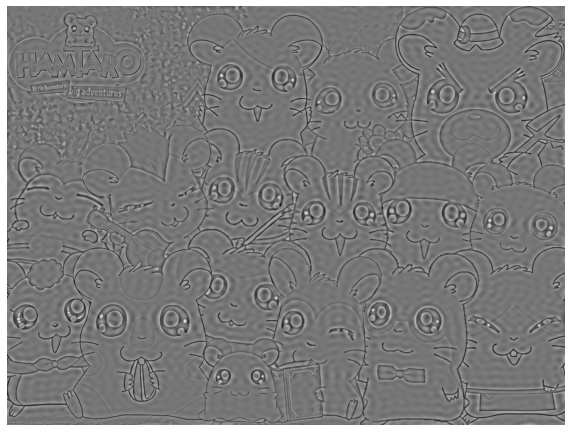

In [14]:
(w, h) = screen_shot.shape
half_w, half_h = int(w/2), int(h/2)

# high pass filter
n = 50
F2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 50x50 (low) frequencies
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2))).astype(int))
plt.show()

im1 = fftpack.ifft2(fftpack.ifftshift(F2)).real
plt.figure(figsize=(10,10))
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.show()

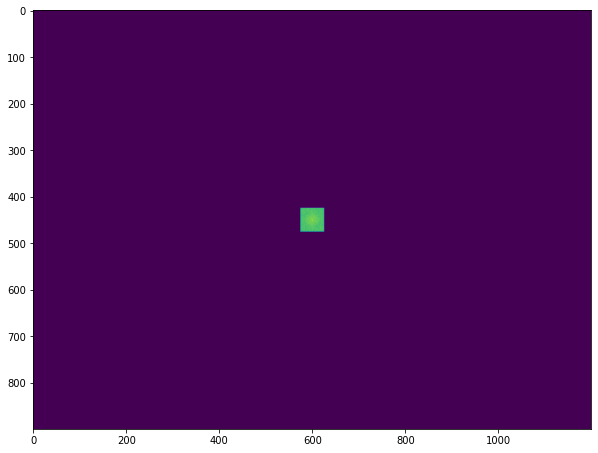

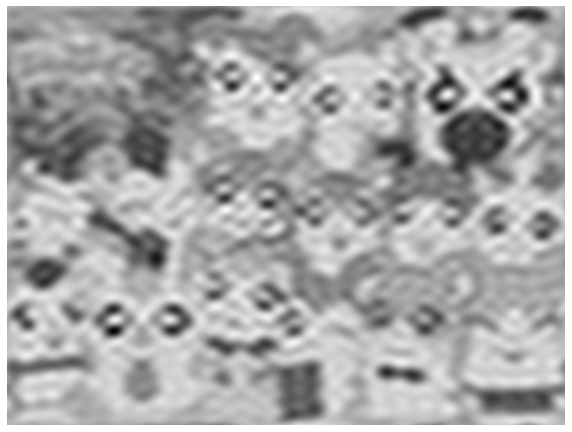

In [12]:
# F1 = fftpack.fft2((im).astype(float))
F2_2 = fftpack.fftshift(F1) # FFT center zeros freq
F2_new = np.zeros_like(F2_2)

# high pass filter
n = 25
F2_new[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = F2_2[half_w-n:half_w+n+1,half_h-n:half_h+n+1]

# select all but the first 50x50 (low) frequencies
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2_new))).astype(int))
plt.show()

im2 = fftpack.ifft2(fftpack.ifftshift(F2_new)).real
plt.figure(figsize=(10,10))
plt.imshow(im2, cmap='gray')
plt.axis('off')
plt.show()

# TODO : Pitch sound checking